In [1]:
# 8.2.1 Extract the Wikipedia Movies JSON

import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = '/Users/darrenlemyacrawford/Desktop/Class folder/Movies-ETL/wikipedia-movies.json'

In [3]:
f'{file_dir}filename'

'/Users/darrenlemyacrawford/Desktop/Class folder/Movies-ETL/wikipedia-movies.jsonfilename'

You may be tempted to try to read the JSON files directly into a Pandas DataFrame. While technically that may be possible, the read_json method that comes built into the Pandas library only works well for data that is already clean—for example, when the JSON data has every field filled in every time it is returned. We call data like this "flat."

The type of data we get from doing a scrape of Wikipedia is pretty messy, so it's easier to load the raw JSON as a list of dictionaries before converting it to a DataFrame.

# Load the JSON into a List of Dictionaries

### To load the raw JSON into a list of dictionaries, we will use the load() method

When opening files in Python, we want to use the "with" statement to handle the file resource.

Using the "with" statement, open the Wikipedia JSON file to be read into the variable "file", and use "json.load()" to save the data to a new variable.

In [4]:
with open(file_dir, mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

Is 7,311 a reasonable number of records? We just want to make sure that we don't have an outlandishly large or small number. If we do, there's potentially something seriously wrong with the data that needs to be investigated before moving on.

One way to check that 7,311 is reasonable is to look at the rate of movies being released that it implies. Rough mental math here is the key—we want these calculations to be quick enough that these checks become a habit. So, let's say that it's about 7,200 movies over about 30 years. That's 240 movies released per year, or a little less than five movies released per week. That seems a little high if we're considering only major movies, but if for every two major motion pictures, there are three indie films, that doesn't seem like an outlandish number.

- always take a look at a few individual records just to make sure data isn't garbled... With a DataFrame, we'd do this with the "head()" and "tail()" methods, **but with a list of dictionaries, we need to inspect the records directly.

In [6]:
# To see the First 5 records

wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
# To see the Last 5 records

wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

- It's always a good idea to check records in the middle as well. Choose a number somewhere around the halfway mark and look at a handful of records after that index.

If everything looks good, congratulations! You're halfway through the Extract step. Now we'll load in the Kaggle data.

In [8]:
# Some records in the middle

wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

# 8.2.2 Extract the Kaggle Data

The Kaggle dataset pulls from the MovieLens dataset of over 20 million reviews and contains a metadata file with details about the movies from The Movie Database (TMDb) (Links to an external site.). Download the zip file from Kaggle (Links to an external site.), extract it to your class folder, and decompress the CSV files. We're interested in the movies_metadata.csv and ratings.csv files.

In [9]:
# Since the Kaggle data is already in flat-file formats, we'll just pull them into 
# Pandas DataFrames directly with the following code:

kaggle_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv')

"low_memory=False" w/o this there will be a warning about a column with mixed data types

In [10]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


- Errors can still occur in the middle of the file, so the best practice is to sample a handful of rows randomly using the "sample()" method. For a DataFrame called "df", "df.sample(n=5)" will show five random rows from the dataset.

### You've just completed the "Extract" step in ETL. We're going to use many of the same ideas, when we get to "Load", we're going to use many of the same ideas we just used to extract the data.

# 8.3.1 Data-Cleaning Strategies
## (Transform: Clean Individual Datasets)

Wikipedia doesn't have strict standards on how movie data is presented, so it needs a lot of work to clean up the data and make it usable, it's in the flexible JSON format, needs to be organized in a structured format before it can be sent to SQL.

Explore your options for cleaning the dataset...The transform step is largely spent on data cleaning. 
Plan. Inspect. Execute.

#### Data beyond repair

could be data that has been overwritten or has suffered severe data corruption during storage or transfer (such as power loss during writing, voltage spikes, or hard-drive failures). The worst-case example would be having data with every value missing. All the information is lost and unrecoverable. For data beyond repair, all we can do is delete it and move on.

#### Data that is badly damaged

may have good data that we can recover, but it will take time and effort to repair the damaged data. This can be garbled data, with a lot of missing values, from inconsistent sources, or existing in multiple columns. Consider trade-offs to pick the best solution (even if the "best" solution isn't perfect, but rather the "best-available" solution). To repair badly damaged data, try these strategies:

- Filling in missing data by
    - substituting data from another source,
    - interpolating between existing data points, or
    - extrapolating from existing data
- Standardizing units of measure (e.g., monetary values stored in multiple currencies)
- Consolidating data from multiple columns

#### Data in the wrong form

should usually be fixed—that is, the data is good but can't be used in its current form. "Good" data in the wrong form can be data that is too granular or detailed, numeric data stored as strings, or data that needs to be split into multiple columns (e.g., address data). To remedy good data in the wrong form, try these strategies:

- Reshape the data
- Convert data types
- Parse text data to the correct format
- Split columns

There is no simple checklist or flowchart we can use to guide; In data cleaning, one has to constantly ask what we might've missed, and following a rigid plan means we won't be asking ourselves those important questions. Data cleaning requires a lot of improvising.

It's important to *document your data cleaning assumptions as well as decisions and their motivations.

As you clean one part of the data, you may reveal something messy in another part, that means *unwinding a lot of work that you've already done and having to redo it with a slight change.

We're not going to try and clean all the data at once. Instead, we're going to focus on *one problem at a time using an iterative process.

# 8.3.2 Iterative Process for Cleaning Data
## (Transform: Clean Individual Datasets)
#### Inspect Plan Execute

Early iterations focus on making the data easier to investigate: deleting obviously bad data, removing superfluous columns (e.g., columns with only one value or missing an overwhelming amount of data), removing duplicate rows, consolidating columns, and reshaping the data if necessary.

...more subtle problems become noticeable.

It's rare to reach a point where no more problems exist in the data. More likely, a point is reached where the work to fix any remaining problems isn't worth the amount of data that would be recovered. After the remaining issues are documented, the transform step is considered finished.

#### Inspect

Most usable data contains too many data points to review every single one, so we'll need to use strategies that tell us about the whole dataset.

First, count how many data points or rows exist. If the data is structured, count the number of columns and missing values in each column. If possible, count the number of unique values in each column and how frequently each unique value appears.

If a column's data type is numeric, we can summarize its data with some basic statistics, such as measures of central tendency (e.g., mean and/or median) and measures of spread (e.g., standard deviation, interquartile range, minimum/maximum). We can also investigate columns with statistical plots, like scatter plots and histograms.

#### Plan

After we've investigated our data and started to identify problem areas, we can make decisions about how to fix the problems...articulating the problems clearly...we'll answer several questions, including:

- If a column doesn't have the right data type, is it a problem with the whole column? Or are just a handful of rows causing the issues?
- Do rows have outliers due to spurious data? Or are they valid data points?
- When values are missing, will they need to be removed, replaced, or interpolated?

The answers to these questions will tell us how we need to modify our data. Keep in mind, there are two main ways: 1)we can modify values and 2)we can modify structure. Modifying data values includes removing rows or columns, replacing values, or generating new columns from old ones.

* Converting a column to a new data type is also a form of replacing values. We can also bin data (like rounding to the nearest hundred), replacing numeric data (e.g., income) with categorical data (e.g., income brackets). We might generate new columns by splitting an existing column into several new columns—by splitting an address column to street, city, state, and zip code columns, for example—or by calculating a new column from multiple existing columns, like calculating total price by multiplying item prices by quantities.

With clearly stated steps to fix the problem, we can make an informed decision about whether implementing the plan is worth the effort. Sometimes there are multiple viable resolutions to choose from. To decide, we weigh trade-offs and ultimately choose the best option.

#### Execute

As we write code to fix the problem, we might discover that the problem is more difficult than initially expected. This is a normal part of the process. As you implement your changes, try to take into account any unintended consequences you could introduce.

##### Cleaning up messy data is a messy process. The best practice is to document every step of your thought process and actions in detail.

# 8.3.3 Investigate the Wikipedia Data
## (Transform: Clean Individual Datasets)

*Initial Investigation - One of the easiest ways to find glaring errors is to just pretend as if there aren't any, and try to jump straight to the finish line. Eventually, we want to clean up the Wikipedia data into tabular data with rows and columns, so let's see what happens if we create a DataFrame from our raw data.

In [12]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### That's a lot of columns! Even if we try to use "print(wiki_movies_df.columns)", they won't all print out. We'll have to convert "wiki_movies_df.columns" to a list to see all of the columns.

#### Use "wiki_movies_df.columns.tolist()" and run the cell to see all of the column names that were imported.

In [13]:
wiki_movies_df.columns.tolist()

#  We can identify column names that don't relate to movie data, such as "Dewey Decimal," 
#  "Headquarters," and "Number of employees.

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

### *Plan - Let's modify our JSON data by restricting it to only those entries that have a director and an IMDb link. We can do this with a list comprehension.

## Use List Comprehensions to Filter Data
We've used list comprehensions previously as a compact way to apply a function to every element in a list.

So far, we've used list comprehensions in the form to compress code that would have been done in a for loop.

#### [expression for element in source_list]

We can also filter out results using a conditional filter expression, as shown below:

#### [expression for element in source_list if filter_expression]

The resulting list will only have elements where the filter expression evaluates to True.

To create a filter expression for only movies with a director and an IMDb link, keep in mind that there are two columns in the data for director information. We'll need to check if either "Director" or "Directed by" are keys in the current dict. If there is a director listed, we also want to check that the dict has an IMDb link. Luckily, that information is only in one column, imdb_link, so our filter expression will look like the following:

#### if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie

*Execute - Create a list comprehension with the filter expression we created and save that to an intermediate variable wiki_movies. See how many movies are in wiki_movies with the len() function.

In [14]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)and 'imdb_link' in movie]
                   
len(wiki_movies)

7080

This only cuts the number of movies down to 7,080. Not too bad. Make a DataFrame from "wiki_movies", and there should only be 78 columns. It may seem counterintuitive that we have fewer columns in the result set when we constrain our results to rows that must have data in certain columns. But there may be columns that only apply to rows that do not have data in the columns we’re targeting. In those cases, the columns will be eliminated, as seen here.

#### This is why it's easier to load the JSON in first and then convert it to a DataFrame. Instead of trying to identify which columns in our DataFrame don't belong, we just remove the bad data points, and the bad columns never get imported in.

In [15]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Inspect - 78 columns are still a lot of columns, so let's keep investigating. 

One thing to watch out for is to make nondestructive edits as much as possible while designing your pipeline. That means it's better to keep your raw data in one variable, and put the cleaned data in another variable. It takes up more memory, but it makes tracking the iterative process of data cleaning easier.

#### For example, if we had just deleted the movies from wiki_movies_raw that didn't have "Directed by" as a key, we'd have made a destructive edit and missed that some have "Director" as the key

*Inspect - There sure are a lot of languages—we'll get to those shortly. For now, one of the columns that stands out is "No. of episodes."

### *Plan - It looks like we've got some TV shows in our data instead of movies. We'll want to get rid of those, too.

*Execute - Don't worry if you didn't catch the "No. of episodes" column in the list. Cleaning data is an iterative process, and if you started with cleaning up the language data first, or some other part of the data, you would see the "No. of episodes" column soon enough. The key is to keep reworking the pipeline bit by bit.

We'll add that filter to our list comprehension:

In [16]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

# 8.3.4 Revisit Functions
## (Transform: Clean Individual Datasets)

Now that you've filtered out bad data, you need to clean up each movie entry so it's in a standard format. If you can make one process broad enough to handle every movie entry, you can apply that process repeatedly for every movie entry. For this task you will create a function.

#### To keep things organized, we are going to make a function that performs that cleaning process.

Functions are blocks of code within a script or algorithm that perform a specific task. There are four basic parts to a function:

    - Name
    - Parameters
    - Code block
    - Return value
    
Scope - Inside the code block of a function, we can use variables that were created outside the function and initialize new variables inside the function.
This is called the "scope" of the variables:

- Variables created outside the function are called "global variables".
- New variables created inside the function are "local variables".
- The hierarchy of variables is called the scope.

### Lambda Functions
There's a special function we can make in Python called lambda, which is the most stripped-down kind we can make.

Lambda functions are written in one line and automatically return a value without using the return keyword. Lambda functions have no name and are also known as "anonymous functions." There are functions that expect other functions to be sent to them as a parameter, and lambda functions are a way to quickly create a concise function to send as a parameter to another function...the basic syntax to a lambda function follows:
#### lambda arguments: expression
This function will take in an argument and will return the expression. Even though lambda functions are supposed to be anonymous, just this once we'll create a lambda function and assign a name so that we can see how they work. A lambda function that squares a value looks like the following:
#### lambda x: x * x
Here, x is the argument, and x * x is the expression. Let's assign this to a name so that we can use it:
#### square = lambda x: x * x
#### square(5)
The output will be:
#### 25

#### If this seems strange, don't worry. The main benefit of lambda functions is that they can be used as one-time-use functions. We'll talk more about lambda functions when we have a more natural use case for them—they'll make more sense at that time.

# 8.3.5 Create a Function to Clean the Data, Part 1
## (Transform: Clean Individual Datasets)

Filtering out bad data isn't enough. You know that you need to make sure the good data that you have is clean enough to use...Now we're ready to create our function to clean our movie data.

First, write a simple function to make a copy of the movie and return it. As we work with our data, we'll iteratively add more to our code block. To start, call the function "clean_movie", and have it take "movie" as a parameter.
#### def clean_movie(movie):
Because the movies are dicts and we want to make nondestructive edits, make a copy of the incoming movie. To make a copy of "movie", we'll use the "dict()" constructor.
- Constructors are special functions that initialize new objects. They reserve space in memory for the object and perform any initializations the object requires. Also, constructors can take parameters and initialize a new object using those parameters.

When we pass "movie" as a parameter to the "dict()" constructor, it reserves a new space in memory and copies all of the info in "movie" to that new space:

In [17]:
def clean_movie(movie):
    movie_copy = dict(movie)

However, we have another trick that's even better.

Inside of the function, we can create a new local variable called "movie" and assign it the new copy of the parameter "movie".

In [18]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy

#### This way, inside of the "clean_movie()" function, "movie" will refer to the local copy. Any changes we make inside "clean_movie()" will now only affect the copy, so if we make a mistake, we still have the original, untouched "movie" to reference.

To finish our skeleton of the "clean_movie" function, return the "movie" variable. (This function doesn't do much right now, but we'll be adding more to it soon.)

In [19]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

*Inspect - take a look at what's going on with those languages. The first one on the list is Arabic, so let's see which movies have a value for "Arabic."

In [20]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

# The different language columns are for alternate titles of the movie.

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [21]:
# Visit the movie's Wikipedia page ...for more details.

wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

### *Plan - The different language columns are for alternate titles of the movie. Let's combine all of them into one dictionary that has all the alternate titles.

To do that, we need to go through each of the columns, one by one, and determine which are alternate titles. Some might be tricky. If you're not sure what a column name means, google it. Also, review a column's data to understand the type of content in that column.

For example, perhaps you've never heard of "McCune–Reischauer." Is it an esoteric filmmaking technique? Google it, and you'll learn it's a romanization system for Korean. Now look at the actual values contained in the column. If the values don't make sense to you either, google them, too.

#### The "value_counts()" method is a quick, easy way to see what non-null values there are in a column.

In [22]:
wiki_movies_df['McCune–Reischauer'].notnull().value_counts()

False    7078
True        2
Name: McCune–Reischauer, dtype: int64

In [23]:
wiki_movies_df['Arabic'].notnull().value_counts()

False    7078
True        2
Name: Arabic, dtype: int64

### SKILL DRILL
Go through each of the columns, one by one, and determine which columns hold alternate titles.

Hint: You might find it easier to sort the column names first as you're going through them. The following will display columns in alphabetical order.
#### sorted(wiki_movies_df.columns.tolist())
**a complete list of columns that hold alternate title data: Also known as, Arabic, Cantonese, Chinese, French, Hangul, Hebrew, Hepburn, Japanese, Literally,  Mandarin, McCune–Reischauer, Original title, Polish,  Revised Romanization, Romanized, Russian, Simplified, Traditional, Yiddish

In [24]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

### Handle the Alternative Titles
### *Plan - Now we can add in code to handle the alternative titles. The logic we need to implement follows:

- Make an empty dict to hold all of the alternative titles.
- Loop through a list of all alternative title keys:
    - Check if the current key exists in the movie object.
    - If so, remove the key-value pair and add to the alternative titles dict.
- After looping through every key, add the alternative titles dict to the movie object.

Try to implement the logic above in your "clean_movie" function on your own.

Hint: To remove a key-value pair from a dict in Python, use the "pop()" method.

*Execute - Step 1: Make an empty dict to hold all of the alternative titles.

In [25]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

Step 2: Loop through a list of all alternative title keys.

In [26]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:

        return movie

Step 2a: Check if the current key exists in the movie object.

In [27]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

            return movie

Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.

In [28]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)


        return movie

Step 3: After looping through every key, add the alternative titles dict to the movie object.

In [29]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

We can make a list of cleaned movies with a list comprehension:

In [30]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.

In [31]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

# 8.3.6 Create a Function to Clean the Data, Part 2
## (Transform: Clean Individual Datasets)

*Inspect - There are quite a few columns with slightly different names but the same data, such as "Directed by" and "Director."

### *Plan - We need to consolidate columns with the same data into one column. We can use the "pop()" method to change the name of a dictionary key, because "pop()" returns the value from the removed key-value pair. 
We have to check if the key exists in a given movie record, so it will be helpful to make a small function inside "clean_movie()".

#### (In fact, it's often preferable. Functions that are defined within another function live within the scope of the first equation. This means that the inner function can only be called inside the outer function.)

It's much easier to understand if you name your functions as verbs. Also, it's better to be explicit than implicit and write out full words, so we'll call our new function "change_column_name".

#### Autocomplete names - usually by pressing the Tab key when you've partially written a variable, function, or keyword; with autocomplete, we can write more descriptive names for functions and variables.

*Execute - Our new function should look like the following. Remember that this new function is enclosed within the clean_movie function that we created earlier:

[def change_column_name(old_name, new_name):

    if old_name in movie:
    
        movie[new_name] = movie.pop(old_name)]

In [32]:
# Remember that this new function is enclosed within the clean_movie function that we created earlier
def change_column_name(old_name, new_name):
    if old_name in movie:
        movie[new_name] = movie.pop(old_name)

To change every instance where the key is "Directed by" to the new key "Director," write the following inside "clean_movie()":

#### change_column_name('Directed by', 'Director')

### * Plan - There's no easy way around the next step: we have to go through each column name and decide if there's a better name for it. If you're not sure what the column is referring to, do some research—don't guess. Use your Google-fu to gain domain knowledge.

(Domain knowledge is specific expertise in the data professional's industry or field, outside of statistics and coding. For example, a data scientist working in healthcare might need specific clinical knowledge to perform certain analyses accurately.)

In [33]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [34]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

#### To track why certain decisions were made, show the evolution of the function through multiple cells.

# 8.3.7 Remove Duplicate Rows
Now that the columns are tidied up, time to move on to the rows!
#### much easier task to perform on a DataFrame
(...just created a process to turn the JSON data into a reasonable DataFrame)

### *Plan - Since we're going to be using the IMDb ID to merge with the Kaggle data, we want to make sure that we don't have any duplicate rows, according to the IMDb ID. First, we need to extract the IMDb ID from the IMDb link.
To extract the ID, use: Regular expressions, also known as regex, are strings of characters that define a search pattern. While the syntax might be new, this is a concept you're already familiar with in the noncoding world.

For example, "MM/DD/YYYY" is a string of characters that defines a pattern for entering dates. You could say it's a regular expression that you can easily recognize because it follows a well-defined pattern. In the same way, "(###) ###-####" is a pattern for entering U.S. phone numbers.

First, we'll use regular expressions in Pandas' built-in string methods that work on a Series object accessed with the [str] property. We'll be using [str.extract()], which takes in a regular expression pattern. IMDb links generally look like "https://www.imdb.com/title/tt1234567/," with "tt1234567" as the IMDb ID. The regular expression for a group of characters that start with "tt" and has seven digits is ["(tt\d{7})"].

- ["()"] — The parentheses marks say to look for one group of text.
- ["tt"] — The ["tt"] in the string simply says to match two lowercase Ts.
- ["\d"] — The ["\d"] says to match a numerical digit.
- ["{7}"] — The ["{7}"] says to match the last thing (numerical digits) exactly seven times.

#### Since regular expressions use backslashes, which Python also uses for special characters, we want to tell Python to treat our regular expression characters as a raw string of text. Therefore, we put an r before the quotes.
We’ll put the extracted IMDB ID into a new column. Altogether, the code to extract the IMDb ID looks like the following:

[wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
]

*Execute - Now we can drop any duplicates of IMDb IDs by using the [drop_duplicates()] method. To specify that we only want to consider the IMDb ID, use the [subset] argument, and set [inplace] equal to [True] so that the operation is performed on the selected dataframe. Otherwise, the operation would return an edited dataframe that would need to be saved to a new variable. We also want to see the new number of rows and how many rows were dropped. The whole cell should look like the following:

In [35]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

# The output says there are now 7,033 rows of data. This means we haven't lost many rows, which is good.

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


## Remove Mostly Null Columns
Now that we've consolidated redundant columns, we want to see which columns don't contain much useful data. Since this is scraped data, it's possible many columns are mostly null.

*Inspect - One way to get the count of null values for each column is to use a list comprehension:

In [36]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

You could also use a for loop and a print statement.

### * Plan - Either way, we can see about half the columns have more than 6,000 null values. Make a list of columns that have less than 90% null values and use those to trim down our dataset.

*Execute - We just have to tweak our list comprehension.

In [37]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

That will give us the columns that we want to keep, which we can select from our Pandas DataFrame as follows:

In [38]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

#### You may have noticed that the "alt_titles" column we created earlier was deleted by this bit of code. It might feel like all that work we did was futile, but it's not. It's possible that all of the alternate title columns individually had less than 10% non-null values, but collectively had enough data to keep.

This is normal for data cleaning because it's an iterative process. Sometimes the hard work you put in doesn't seem to make it to the final product, but it's in there.

And with that, we've reduced 191 messy columns down to 21 useful, data-filled columns.

# 8.3.8 Make a Plan to Convert and Parse the Data

The Wikipedia data is now structured in tabular form, but it needs to have the right data types once it's in the SQL table. Some of the data has numeric information written out (like the word "million"); To convert those columns to numbers, the data needs to be parsed.

*Inspect - identify which columns need to be converted. [wiki_movies_df.dtypes] will display the data type for each column.

In [39]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

### *Plan - The apply function takes and applies another function to every single value of a Pandas series. Looking through the data, column by column, we see that:

- Box office should be numeric.
- Budget should be numeric.
- Release date should be a date object.
- Running time should be numeric.

"Box office" and "Budget" amounts aren't written correctly...It will be helpful to only look at rows where box office data is defined, so first make a data series that drops missing values with the following:

In [40]:
box_office = wiki_movies_df['Box office'].dropna()

As a habit, always check the number of data points that exist after you drop any data.

In [41]:
# Check length of list... 5485
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

#### Regular expressions only work on strings...
make sure all of the box office data is entered as a string. By using the [map()] method, we can see which values are not strings. 

First, make a [is_not_a_string()] function:

In [42]:
def is_not_a_string(x):
    return type(x) != str

In [43]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

#### types of functions that will work here... We don't need to use it ever again outside of our map() call, so we don't need to give it a name.
What we want is a stripped-down, one-line way of writing our functions. Having to create a new function every time we want to use the map() method is cumbersome and interrupts the readability of our code.

This is what lambda functions are made for. Instead of creating a new function with a block of code and the [def] keyword, we can create an anonymous lambda function right inside the [map()] call.

Remember, lambda functions don't have a name (because they don't need one) and automatically return a variable. They use the following syntax:

[lambda arguments: expression]

The lambda function version of [is_not_a_string()] is:

[lambda x: type(x) != str]

We can update our [map()] call to use the lambda function directly instead of using [is_not_a_string()]:

[ box_office[box_office.map(lambda x: type(x) != str)] ]

In [44]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

From the output, we can see that there are quite a few data points that are stored as lists. There is a [join()] string method that concatenates list items into one string; however, we can't just type [join(some_list)] because the [join()] method belongs to string objects.

[ some_list = ['One','Two','Three']

'Mississippi'.join(some_list)]

The outputs would be:

[ 'OneMississippiTwoMississippiThree' ]

Some are written either like "\$123.4 million" (or billion) or "\$123,456,789." We'll use regular expressions to find out just how many of each style are in our data. There is a built-in Python module for regular expressions: [ re. ] We'll need to import that library, so add the line below to the first cell

#### We need to make a separator string and then call the [ join() ] method on it. We'll use a simple space as our joining character and apply the [ join() ] function only when our data points are lists. The code looks like the following:

In [45]:
# Convert any lists to strings
import re
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

# 8.3.9 Write Regular Expressions
#### Regular expressions are just strings of characters that are used as a search pattern. 
They are used to test if strings are in a specific format or contain a substring in a specific format, to extract pertinent information from strings while discarding unnecessary information, and to perform complicated replacements of substrings.

## Literal Characters
are the simplest character class. A regular expression made of literal characters will match any string that contains the expression as a substring. For example, if we made a regular expression of the string "cat" and used it to search for any matches in another string—"The tomcat was placated with the catch of the day"—it would match three times...regular expressions also have special characters that make it much more powerful than just finding a substring. (already used the special character [ \d ] to find any digit from 0 to 9.)

## Character Types:  \d, \w, \s (and \D, \W, \S)
- [ \d ] will match any digit from 0 to 9.
- [ \D ] will match any non-digit character.
- [ \w ] matches a word character (a letter, digit, or underscore).
- [ \W ] matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).
- [ \s ] will match any whitespace character (including spaces, tabs, and newlines).
- [ \S ] will match any non-whitespace characters.

## Character Sets:  [ ]
If one need to be more specific than digits, alphanumeric characters, or whitespace characters, one can use the square brackets to define a character set. For example, "[ceh]at" would match '"cat", "eat", "hat", and "that", but not "rat."

We can also specify ranges of characters inside a character set. For example:

- [ "[a-z]" ] matches any lowercase letter.
- [ "[A-Z]" ] matches any uppercase character.
- [ "[0-9]" ] matches any digit.

We can include multiple ranges, so:

- [ "[a-zA-Z]" ] matches any lowercase or uppercase letter.
- [ "[a-zA-Z0-9]" ] matches any alphanumeric character.

But, we can also have smaller ranges, such as:

- [ "[A-E]" ] would match "A", "B", "C", "D", or "E".
- [ "[1-3]" ] would match the digits "1", "2", or "3".

One can also include character types inside a character set, so [ "[a-zA-Z\d]" ] and [ "[a-zA-Z0-9]" ] are equivalent expressions that would match any alphanumeric character.

Inside of a character set, we can specify a character that we do NOT want to include by prefacing it with a caret:[ ^ ]

## Match (Almost) Everything:  .
The period, or dot ([ . ]), is a *wildcard in regular expressions, which means it will match any single character whether it is a digit, a letter, whitespace, or punctuation. The only thing that a dot won't match is a line break...if we need metacharacters to act like ordinary literal characters? For example, if we use the regular expression "ca.," the dot will match any character, so "cat", "car", "cab", "ca!", "ca?", and "ca." would all be matches.

#### The dot and square brackets are examples of metacharacters in regular expressions. Metacharacters are like the superheroes in a regular expression because they have powers like "match everything" or "create a character set."

## Escaping:  \
If one wants to specifically search for only "ca." with an actual period, the period by itself in a regular expression is matching everything; so when one wants it to act like just a literal character -use the backslash "[ \ ]" to do this.

The backslash tells the parser to treat the upcoming metacharacter like a literal character. So, "ca\." will only match "ca."

The backslash in a regular expression is called the escape character; it enables the next character gets to escape its duties as a special character in the regular expression and act like the literal character.

## Special Counting Characters:  *, +, {}, ?
There are also special counting characters that specify how many times a character can show up.

The first counting character is the asterisk: * . In regular expressions, the asterisk says the previous character can repeat any number of times, including zero. So, "ca* t" would match "cat" and "caaat" but also "fiction."

If we want to specify that the character has to show up at least once, we use the plus sign: +. So, "ca+t" would match "cat" and "caaat" but not "fiction."

If we want to search for a character that shows up an exact number of times, we use the curly brackets: { }. When we extracted the IMDb IDs, we wanted IDs that had exactly seven digits, or "\d{7}". We can also put two numbers in curly brackets, and that would match for any number of digits within that range. So, "ca{3}t" wouldn't match "cat" or "fiction" but would match "caaat." "ca{3,5}t" would match "caaat", "caaaat", and "caaaaat"

The question mark can be considered a counting character as well. The question mark is for optional characters, which means they can show up zero or one time. So, "ca?t" is equivalent to the regular expression pattern "ca{0,1}t".

## Alternation:  |
If we want to search for a given string or a different string, we use the alternation character, or pipe: |. This essentially functions as a logical OR. For example, if we wanted to match "cat" or "mouse" or "dog," we would make a string "cat|mouse|dog."

## String Boundaries:  ^ and $ 

If we need to make sure that our expression matches only at the beginning or ending of the string, we use the caret (^) to represent the beginning of the string, and the dollar sign ($) to represent the end of the string. So, "^cat" would match "cat" and "catatonic," but not "concatenate." 

"cat$" would also match "cat" and "tomcat," but not "catatonic."

By themselves, the string boundaries represent *zero length matches; in other words, they don't match any actual characters themselves, just the boundaries of the string being searched.

## Capture Groups:  ( )
Grouping in regular expressions serves two purposes. First, groups can be used to add structure to a search pattern. For example, "1,000", "1,000,000", and "1,000,000,000" as strings all have a similar structure. There is a comma followed by three zeros that repeats as a group. We can match all of these with one regular expression, using parentheses to create a capture group. One regular expression that matches all three strings would be "1(,000)+."

#### The second purpose for grouping is hinted at in the name "capture group." Capture groups are how regular expressions define what information should be extracted.

For example, when we needed to extract IMDb IDs from the links, we put the entire expression inside brackets. This can also be helpful when you need to make sure a long string matches a certain format, but you only need a substring inside of it.  Another example, "\d{3}-\d{3}-\d{4}" would match ANY phone number in the form "333-333-4444," but if you wanted to extract only the digits, you would use "(\d{3})-(\d{3})-(\d{4})", and only the digits would be captured. Specifically, the digits of the phone number would be captured into three groups

## Non-Capturing Groups and Negative Lookahead Groups:   (?: ), (?! )
We can modify the behavior of a group by including a question mark after the opening parenthesis. The first modification is a **non-capturing group, which uses a colon after the question mark. This specifies that we only want to use the grouping structure, and we do not need to capture the information.

#### Very important when we using regular expressions for matching and replacing.

Suppose we're anonymizing a list of phone numbers, The regular expression "(?:\d{3})-(\d{3})-(?:\d{4})" will match numbers of the form "123-456-7890," but it will only capture the middle group, the prefix. For example:

- "212-012-9876" matches the regular expression "(?:\d{3})-(\d{3})-(?:\d{4})", but only "012" is captured. So, if we used this regular expression to replace the captured text with "555," it would turn "212-012-9876" to "212-555-9876."

_Negative lookahead_ groups are also non-capturing groups, but they look ahead in the text and make sure a string doesn't exist after the match...a regular expression that matches the first 10 numbers, but also checks that there isn't another digit after the phone number. A a negative lookahead group reports back "negative" if there's some text we don't want to see, they start with a question mark and an exclamation mark. For example:

- [ "(?!\d)" ] Our new regular expression is [ "(\d{3})-(\d{3})-(\d{4})(?!\d)" ]:

    "333-333-4444" will match.
    
    "333-333-55555" will not.

### Cheat sheet:

#### [^ … ]	Negative Character Set

Matches anything not inside the brackets

  [ "[^C-E]" ]
    
- “A”
- “B”
- “C” (no match)
- “D” (no match)
- “E” (no match)

#### [ * ]	

Matches 0 or more times	
    
  [ "ca*t" ]

- “ct”
- “cat”
- “caat”
- “caaat”
- “caaaat”

#### [ +	] 

Matches 1 or more times	

  [ "ca+t" ]

- “ct” (no match)
- “cat”
- “caat”
- “caaat”
- “caaaat”

#### [ ?	] 

Matches 0 or 1 time	

  [ "ca?t" ]
   
- “ct”
- “cat”
- “caat” (no match)
- “caaat” (no match)
- “caaaat” (no match)

#### [ {#} ]

Matches a specific number of times	

  [ "ca{2}t" ]

- “ct” (no match)
- “cat” (no match)
- “caat”
- “caaat” (no match)
- “caaaat” (no match)

#### [ {#,} ]

Matches at least a specific number of times	

  [ "ca{2,}t" ]

- “ct” (no match)
- “cat”(no match) 
- “caat”
- “caaat”
- “caaaat”

#### [ {#,#} ]

Matches within a specific range of times

  [ "ca{2,3}t" ]

- “ct” (no match)
- “cat” (no match)
- “caat”
- “caaat” 
- “caaaat” (no match)

#### [ ^	] 

Start of the string

  [ "^cat" ]

- “cat”
- “catsup”
- “concatenate” (no match)
- “kitty-cat” (no match)

#### [ $ ] 

End of the string	

   [ "cat$" ]

- “cat”
- “catsup” (no match)
- “concatenate” (no match)
- “kitty-cat”

#### [ <\code> ] Escape Character

Escapes the next character to be treated as a literal character

   [ "\ ?"] 

- “?”

#### [ ( … ) ] Capture Group

Identifies matches that should be extracted

  [ "c(at)" ]
   
- “cat” (“at” is captured)
- “bat” (no match)

#### [ (?: … ) ]	Non-Capturing Group

Identifies matches that should NOT be extracted

 [ "c(?:at)" ]
 
- “cat” ("c" is captured)
- “bat” (no match)

#### (?! … )	Negative Lookahead Group

Identifies expressions that negate earlier matches

  [ "cat(?! burglar)" ]
   
- “cat”
- “cats”
- “cat burglar” (no match)

#### [ |	]  Alternation

Matches either the expression before or the expression after

   "cat|dog"

- “cat”
- “dog”
- “bird” (no match)

It's extremely helpful to use a regular expression tester like RegExr (Links to an external site.) or RegEx101 (Links to an external site.) when building more complicated regular expressions.

# 8.3.10 Parse the Box Office Data
Apply regular expressions to the box office data.

### Plan - There are two main forms the box office data is written "123.4 million" (or billion), and "123,456,789." We're going to build a regular expression for each form

For the first form, translate the rules into a regular expression, step by step,
our pattern match string will include six elements in the following order:

1. A dollar sign - a special character in regular expressions, so we'll need to escape it [ "\ $" ].


2. An arbitrary (but non-zero) number of digits - add the[ \d ] character to specify digits only, and the [ + ] modifier to capture one or more digits. Our regular expression string now appears as [ "\ $\ d+" ].


3. An optional decimal point - the decimal point is a special character, so it needs to be escaped with a backslash. Since the decimal point is optional, add a question mark modifier after it. Our regular expression string now appears as [ "\ $\d+\ .?" ].


4. An arbitrary (but possibly zero) number of more digits - Once again, we'll use the [ \d ] character to specify digits only, but now with the [ * ] modifier because there may be more digits after the decimal point. [ "\ $\ d+\ .?\ d* " ].



5. A space (maybe more than one) - use the [ \ s ] character to match whitespace characters. To be safe, match any number of whitespace characters with the [ * ] modifier. [ "\ $\ d+\ .?\ d*\ s * " ].



6. Add the word "million" or "billion" - Since "million" and "billion" only differ by one letter, one can match it with a character set for the first letter; specify character sets with square brackets, so we'll add "[mb]illion" to the end of our string. [ "\ $\ d+\ .?\ d*\ s * [mb]illion" ]

Create a variable [ form_one ] and set it equal to the finished regular expression string, because we need the escape characters to remain, so one needs to preface the string with an [ r ].

In [46]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

...Wondering if we're going to miss any box office values that have uppercase letters...the  [ contains() ] method, will specify to ignore case.

*Inspect - to count up how many box office values match our first form -use the [ str.contains() ] method on [ box_office ]. To ignore whether letters are uppercase or lowercase, add an argument called [ flags ], and set it equal to [ re.IGNORECASE ]. In case the data is not a string, we'll add the [ na=False ] argument to parse the non-string data to [ False ]. Finally, we can call the [ sum() ] method to count up the total number that return True

In [47]:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

# There are 3,896 box office values that match the first form "$123.4 million/billion."

3896

### Plan - match the numbers of our second form, "123,456,789."  Our pattern match string will include the following elements:

1. A dollar sign - Escape the dollar sign for it to match. [ "\ $" ]


2. A group of one to three digits - use the [ \d ] character for digits, but this time, we'll modify it with curly brackets to only match one through three repetitions or one up to three digits: [ "\ $\ d{1,3}" ]


3. At least one group starting with a comma and followed by exactly three digits (1000s) - To match a comma and exactly three digits, 

    use the string [ ",\ d{3}" ]. 

    To match any repetition of that group (100s), put it inside parentheses, and then a plus sign after the parentheses: [ "(,\ d{3})+" ].

    #### We'll add one more modification to specify that this is a non-capturing group by inserting a question mark and colon after the opening parenthesis: "(?:,\d{3})+". The use of a non-capturing group isn’t strictly necessary here, but it eliminates an unwanted warning message in Jupyter Notebook.
    
Create another variable [ form_two ] and make it a raw string so Python keeps the escaped characters (), set it equal to the finished regular expression: [ "\ $\ d{1,3}(?:,\ d{3})+" ]

In [48]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

## Compare Values in Forms

*Inspect - Most of the box office values are described by either form. Now we want to see which values aren't described by either.

See if any box office values are described by both;
To make code easier to understand, create two Boolean Series [ matches_form_one ] & [ matches_form_two ], and then select the box office values that don't match either. Create the two Boolean series with the following code:

In [49]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

Recall the Python logical keywords "not," "and," and "or." Try the following code to see which values in [ box_office ] don't match either form.

    # this will throw an error!
    box_office[(not matches_form_one) and (not matches_form_two)]

The code above will give you a ValueError with the explanation "The truth value of a Series is ambiguous." (the meaning of that error is also ambiguous as well.)

Instead, Pandas has element-wise logical operators:

- The element-wise negation operator is the tilde: ~ (similar to "not")
- The element-wise logical "and" is the ampersand: &
- The element-wise logical "or" is the pipe: |

The code to use is:

In [50]:
# this will throw an error!
# box_office[(not matches_form_one) and (not matches_form_two)]

box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

## Fix Pattern Matches
### Plan - We can fix our pattern matches to capture more values by addressing these issues:

1. Some values have spaces in between the dollar sign and the number. - This is easy to fix. Just add [ \s* ] after the dollar signs. The new forms should look like the following:

    #### form_one = r'\ $\ s* \ d+\ .?\ d* \ s* [mb]illion'
    
    #### form_two = r'\ $\ s*\ d{1,3}(?:,\ d{3})+'


2. Some values use a period as a thousands separator, not a comma. - This is slightly more complicated, but doable. Simply change [ form_two ] to allow for either a comma or period as a thousands separator. We’d ordinarily do that by putting the comma and period inside straight brackets [,.], but the period needs to be escaped with a slash [,\.]. The code should match the following:

    #### form_two = r'\ $\ s*\ d{1,3}(?:[,\ .]\ d{3})+'
    
    The results will also match values like 1.234 billion, but we're trying to change raw numbers like $123.456.789. We don't want to capture any values like 1.234 billion, so we need to add a negative lookahead group that looks ahead for "million" or "billion" after the number and REJECTS the match if it finds those strings or to not search for it or replace or any of the such...

    #### form_two = r'\ $\ s*\d{1,3}(?:[,\ .]\d{3})+(?!\s[mb]illion)'


3. Some values are given as a range. - search for any string that starts with a dollar sign and ends with a hyphen, and then replace it with just a dollar sign using the [ replace() ] method. The first argument in the [ replace() ] method is the substring that will be replaced, and the second argument in the [ replace() ] method is the string to replace it with. We can use regular expressions in the first argument by sending the parameter [ regex=True ], as shown below.

    #### box_office = box_office.str.replace (r' \ $ . * [-—–](?![a-z])', ' $ ', regex=True)



4. "Million" is sometimes misspelled as "millon." - make the second "i" optional in our match string with a question mark as follows:

    #### form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
    
The rest of the box office values make up such a small percentage of the dataset and would require too much time and effort to parse correctly, just ignore them.

### We're finished writing our regular expressions for the box office values. The hard part is over!

In [51]:
# 1
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [52]:
# 2 
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [53]:
# 2
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [54]:
# 3
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [55]:
# 4
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

## Extract and Convert the Box Office Values
*Execute - Now that we've got expressions to match almost all the box office values, we'll use them to extract only the parts of the strings that match. We do this with the [ str.extract() ] method. This method also takes in a regular expression string, but it returns a DataFrame where every column is the data that matches a capture group. 
#### Make a regular expression that captures data when it matches either [ form_one ] or [ form_two ]. We can do this easily with an f-string.

The f-string [ f'{form_one}|{form_two}' ] will create a regular expression that matches either [ form_one ] or [ form_two ], put the entire thing in parentheses to create a capture group. The full line of code to extract the data follows:

In [56]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


### Now we need a function to turn the extracted values into a numeric value. We'll call it [ parse_dollars ], and it will take in a string and return a floating-point number. (...start by making a skeleton function with comments explaining each step, and then fill in the steps with actual code.)

...working directly with strings, we'll use the [ re ] module to access the regular expression functions. We'll use [ re.match(pattern, string) ] to see if our string matches a pattern. To start, we'll make some small alterations to the forms we defined, splitting the million and billion matches from form one.

In [57]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

Next, we'll use [ re.sub(pattern, replacement_string, string) ] to remove dollar signs, spaces, commas, and letters, if necessary.

In [58]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

Finally, convert all the strings to floats, multiply by the right amount, and return the value.

In [59]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

First, we need to extract the values from [ box_office ] using [ str.extract ]. Then we'll apply [ parse_dollars ] to the first column in the DataFrame:

In [60]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office'].count()

5466

In [61]:
wiki_movies_df.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0


We no longer need the Box Office column, so we'll just drop it:

In [62]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [63]:
wiki_movies_df.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0


# 8.3.11 Parse Budget Data
We'll use the same pattern matches and see how many budget values are in a different form. First, we need to preprocess the budget data, just like we did for the box office data.

Create a budget variable with the following code:

In [64]:
budget = wiki_movies_df['Budget'].dropna()

Convert any lists to strings:

In [65]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

Then remove any values between a dollar sign and a hyphen (for budgets given in ranges):

In [66]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

*Inspect

In [67]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

That parsed almost all of the budget data. However, there's a new issue with the budget data:
#### citation references (the numbers in square brackets).

## *Plan - remove (the numbers in square brackets) with a regular expression.
Remove the citation references with the following:

In [68]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

/Users/darrenlemyacrawford/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

There will be 30 budgets remaining.

There are a handful of values that could be parsed into usable data points without worrying about currency conversion, but we have almost 4,700 other budget values to work with, so even 30 values is less than 1% of the data.

"The juice isn't worth the squeeze."

In [69]:
budget[~matches_form_one & ~matches_form_two].count()

38

*Execute - Everything is now ready to parse the budget values. We can copy the line of code we used to parse the box office values:

In [70]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

We can also drop the original Budget column.

In [71]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

### Parse Release Date
Parsing the release date will follow a similar pattern to parsing box office and budget, but with different forms.

First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

In [72]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

## *Plan - The forms we'll be parsing:

1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
3. Full month name, four-digit year (i.e., January 2000)
4. Four-digit year

*Execute - parse those forms is with the following:

In [73]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

Of the four regular expressions, the first matches the [ month, dd, yyyy ] format. The second matches these two formats, for example: [ yyyy-mm-dd ] and [ yyyy/mm/dd ]. The third matches [ month yyyy ]. The fourth matches[ yyyy ].

In [74]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


Instead of creating our own function to parse the dates, we'll use the built-in [ to_datetime() ] method in Pandas. Since there are different date formats, set the [ infer_datetime_format ] option to [ True ]. The date formats we've targeted are among those that the to_datetime() function can recognize, which explains the [ infer_datetime_format=True ] argument below.

In [75]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

### Parse Running Time
First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

In [76]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

*Inspect - It looks like most of the entries just look like "100 minutes." Let's see how many running times look exactly like that by using string boundaries.

In [77]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

(94% of 6894) returns 6,528 entries...Let's get a sense of what the other 366 entries look like.

In [78]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

Let's make this more general by only marking the beginning of the string, and accepting other abbreviations of "minutes" by only searching up to the letter "m."

In [79]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

That accounts for 6,877 entries. The remaining 17 follow:

In [80]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

#### We can capture some more of these by relaxing the condition that the pattern has to start with at the beginning of the string, but the entries with hours and minutes listed separately will give erroneous data.

Even though it's a very small number of entries, it's not too hard to parse, so parse those, too.

(This is another judgment call. It's only 17 entries out of almost 7,000, so it's highly unlikely that our analysis will be affected by just ignoring these data points. In a time crunch, it would be perfectly acceptable to just move on. However, it's not very difficult to parse these new forms, and we'll have more flexible code if we do. If we decide to do another, larger scrape of Wikipedia data, it's entirely possible that a significant portion have their runtime formatted this way.)

## *Plan - We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

1. Start with one or more digits.
2. Have an optional space after the digit and before the letter "h."
3. Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
4. Have an optional space after the "hours" marker.
5. Have an optional number of digits for minutes.
6. As a pattern, this looks like [ "\d+\s* ho?u?r?s?\s* \d* " ].

*Execute - only want to extract digits, and we want to allow for both possible patterns. Therefore, we'll add capture groups around the \d instances as well as add an alternating character. Our code will look like the following.

In [81]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract.head()

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95


Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values...bc we may have captured empty strings, we'll use the [ to_numeric() ] method and set the errors argument to [ 'coerce' ]. Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use [ fillna() ] to change all the NaNs to zeros.

In [82]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract.head()

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0


Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, and save the output to [ wiki_movies_df ]:

In [83]:
# last column
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11,102.0


Finally, we can drop [ Running time ] from the dataset with the following code and The Wikipedia dataset will be cleaned:

In [84]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11,102.0


# 8.3.12 Clean the Kaggle Data
The Kaggle data is much more structured, but it still requires some cleaning, including converting strings to correct data types.

#### As always when data cleaning, the first step is to take an initial look at the data you're working with.
*Inspect - Because the Kaggle data came in as a CSV, one of the first things we want to check is that all of the columns came in as the correct data types.

In [85]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

The "object" data type is usually for strings...four columns are a "data type"— [revenue], [runtime], [vote_average], and [vote_count] ...more columns (6) should be specific "data types".

Just go down the list and convert the data types for each of the six columns that need to be converted.

Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.

In [86]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

...we have some bad data in here, remove it.

### Remove Bad Data
To remove the bad data, use the following:

In [87]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Take a closer look at the three movies that appear to have corrupted data...Somehow the columns got scrambled for these three movies.

Ideally, we'd want to be able to unscramble the rows and recover the data. But since we don't know what caused the data to be scrambled, it's also possible that even if we got all the data into the right columns, the data would still be corrupt.

The biggest concern is that none of the data in these rows have an [ imdb_id ]. Since that's missing in these rows its not good data...drop them.

#### In fact, since we probably don't want to include adult movies in the hackathon dataset, we'll only keep rows where [ adult ] is [ False ], and then drop the "adult" column.

1.The following code will keep rows where the adult column is [ False ], and 2.then drop the adult column:

In [90]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')
kaggle_metadata.head()

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


*Inspect - Next, we'll look at the values of the video column:

In [91]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

#### Great, there are only [ False ] and [ True ] values. We can convert [ video ] fairly easily...from "int64" to "bool"

### Convert Data Types
*Execute -To convert, use the following code:

In [93]:
# " == 'True' " changes to/returns all Booleans...includes True & False values from above

kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

#### The above code creates the Boolean column we want...assign it back to video:

In [94]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [95]:
# Verify
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

## *Plan - For the numeric columns, we can just use the [ to_numeric() ] method from Pandas. 

#### We'll make sure the [ errors= ] argument is set to [ 'raise' ], so we'll know if there's any data that can't be converted to numbers.

*Execute - code below, plan from above

In [96]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [97]:
kaggle_metadata.dtypes

belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

#### Finally, convert [ release_date ] to datetime. Pandas has a built-in function for that as well: [ to_datetime() ].

## *Plan - 
Since [ release_date ] is in a standard format, [ to_datetime() ] will convert with ease.

In [99]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

### Reasonability Checks on Ratings Data
*Inspect - Lastly, take a look at the ratings data. We'll use the [ info() ] method on the DataFrame. Since the ratings dataset has so many rows, we need to set the [ null_counts ] option to [ True ].

In [101]:
# ratings.info(null_counts=True) <- soon to expire code
# RatingsCSV downloaded earlier...

ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


For our own analysis, we won't be using the timestamp column; however, we will be storing the rating data as its own table in SQL, so we'll need to convert it to a datetime data type. From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970.

(Storing time values as a data type is difficult, and there are many, many standards out there for time values. Some store time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix epoch. There are other epochs in use, but the Unix epoch is by far the most widespread.)

Specify in [ to_datetime() ] that the origin is [ 'unix' ] and the time unit is seconds.

In [102]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

## *Plan - 

These dates don't seem outlandish—the years are within expected bounds, and there appears to be some consistency from one entry to the next.
#### Since the output looks reasonable, assign it to the timestamp column.

*Execute -

In [106]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36
...,...,...,...,...
26024284,270896,58559,5.0,2009-10-31 23:26:04
26024285,270896,60069,5.0,2009-10-31 23:33:52
26024286,270896,63082,4.5,2009-10-31 23:29:24
26024287,270896,64957,4.5,2009-11-01 00:06:30


*Inspect - Finally, look at the statistics of the actual ratings and see if there are any glaring errors. A quick, easy way to do this is to look at a histogram of the rating distributions, and then use the [ describe() ] method to print out some stats on central tendency and spread.

(A histogram is a bar chart that displays how often a data point shows up in the data. A histogram is a quick, visual way to get a sense of how a dataset is distributed.)

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

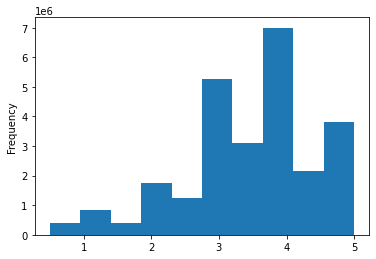

In [107]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

...make sense, people are more likely to give whole number ratings than half, which explains the spikes in the histogram. The median score is 3.5, the mean is 3.53, and all the ratings are between 0 and 5.
The ratings dataset looks good to go, which means we're done with the first half of the Transform step...